# Exploratory Data Analysis 

This project aims to model and predict the the mortality rate in hospitals in patients by using a 1988 dataset of patient information from the Cleveland database, which can be found on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci) and [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

The project is divided into three separate Jupyter notebooks:

1. Exploratory Data Analysis (below)
2. [Modeling](https://github.com/melaniewalsh/heart-disease-prediction/blob/master/Modeling.ipynb)
3. [Conclusions](https://github.com/melaniewalsh/heart-disease-prediction/blob/master/Conclusions.ipynb)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import seaborn as sns
import pymongo
from pymongo import MongoClient

In [2]:
#Establish connection
connection = MongoClient('localhost', 27017 )
db = connection.mlproj

In [3]:
data = db.mlproject
mlList = data.find()

In [4]:
for item in mlList:
    print("Age: " + item["age"] + " " + "Sex: " + item["sex"])

In [5]:
df = pd.DataFrame(list(data.find()))

In [6]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
heart = pd.read_csv(r"C:\Users\Asus\Desktop\heart-disease-prediction-master-20220110T101007Z-001\heart-disease-prediction-master\data\heart.csv")

## Heart disease data set attribute information

> 1. age 
> 2. sex (1= male; 0=female)
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)
> 14. target (0 = no heart disease; 1 = heart disease)

## Rename columns so things make sense to my brain

In [8]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})

In [9]:
heart['health_status'] = heart['target']

In [10]:
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [11]:
heart['gender'] = heart['sex']

In [12]:
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [13]:
heart.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,sick,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,sick,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,sick,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,sick,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,sick,F


In [14]:
heart.tail()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,healthy,F
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,healthy,M
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,healthy,M
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,healthy,M
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,healthy,F


In [15]:
heart.shape

(303, 16)

In [16]:
heart.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart.dtypes

age                 int64
sex                 int64
chest_pain          int64
blood_pressure      int64
cholesterol         int64
blood_sugar         int64
restecg             int64
thalach             int64
exang               int64
oldpeak           float64
slope               int64
vessels             int64
thal                int64
target              int64
health_status      object
gender             object
dtype: object

**Find and show duplicates**

In [18]:
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M


**Drop duplicates**

In [19]:
heart = heart.drop_duplicates(keep='first')

**Find out how many people do and don't exhibit heart disease**

In [20]:
heart['health_status'].value_counts()

sick       164
healthy    138
Name: health_status, dtype: int64

## Get an overview distribution of each column

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

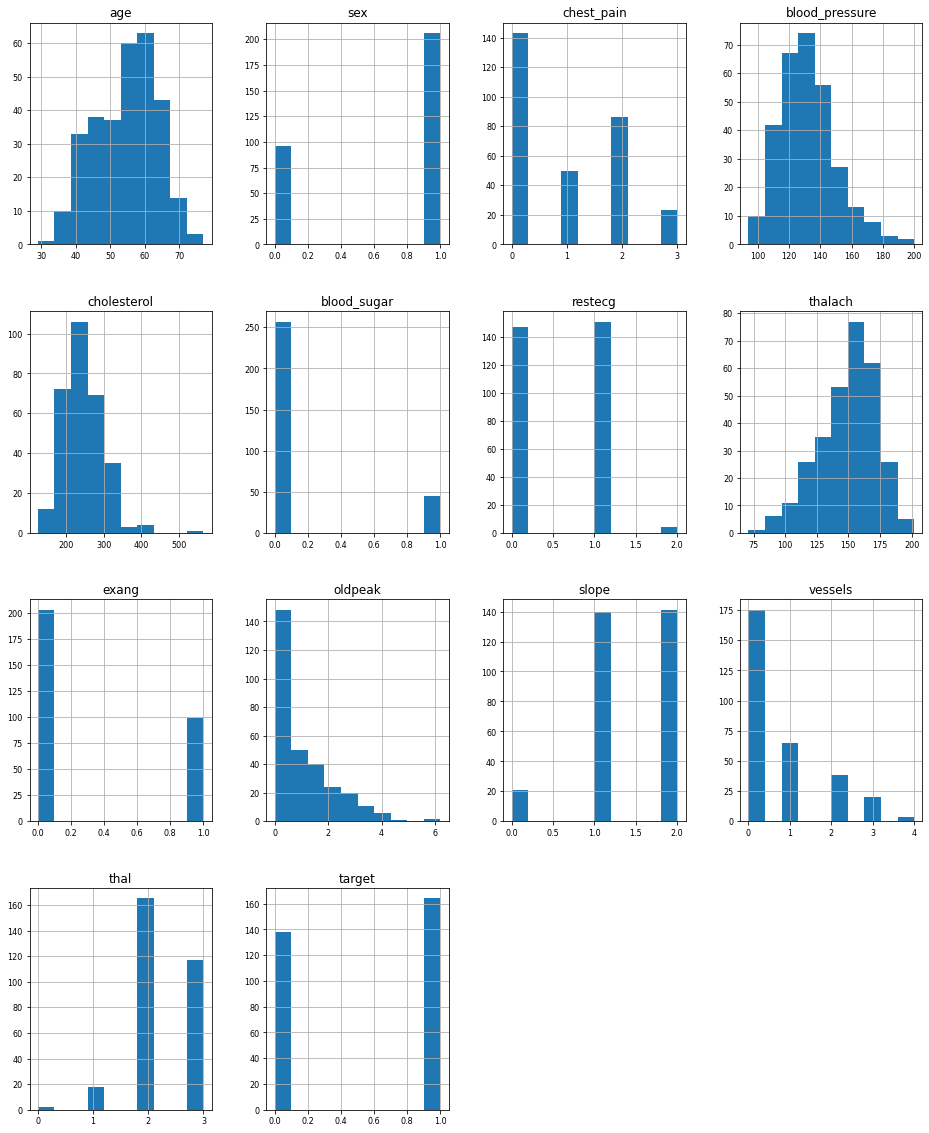

In [21]:
#heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# add bins ^^^

heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

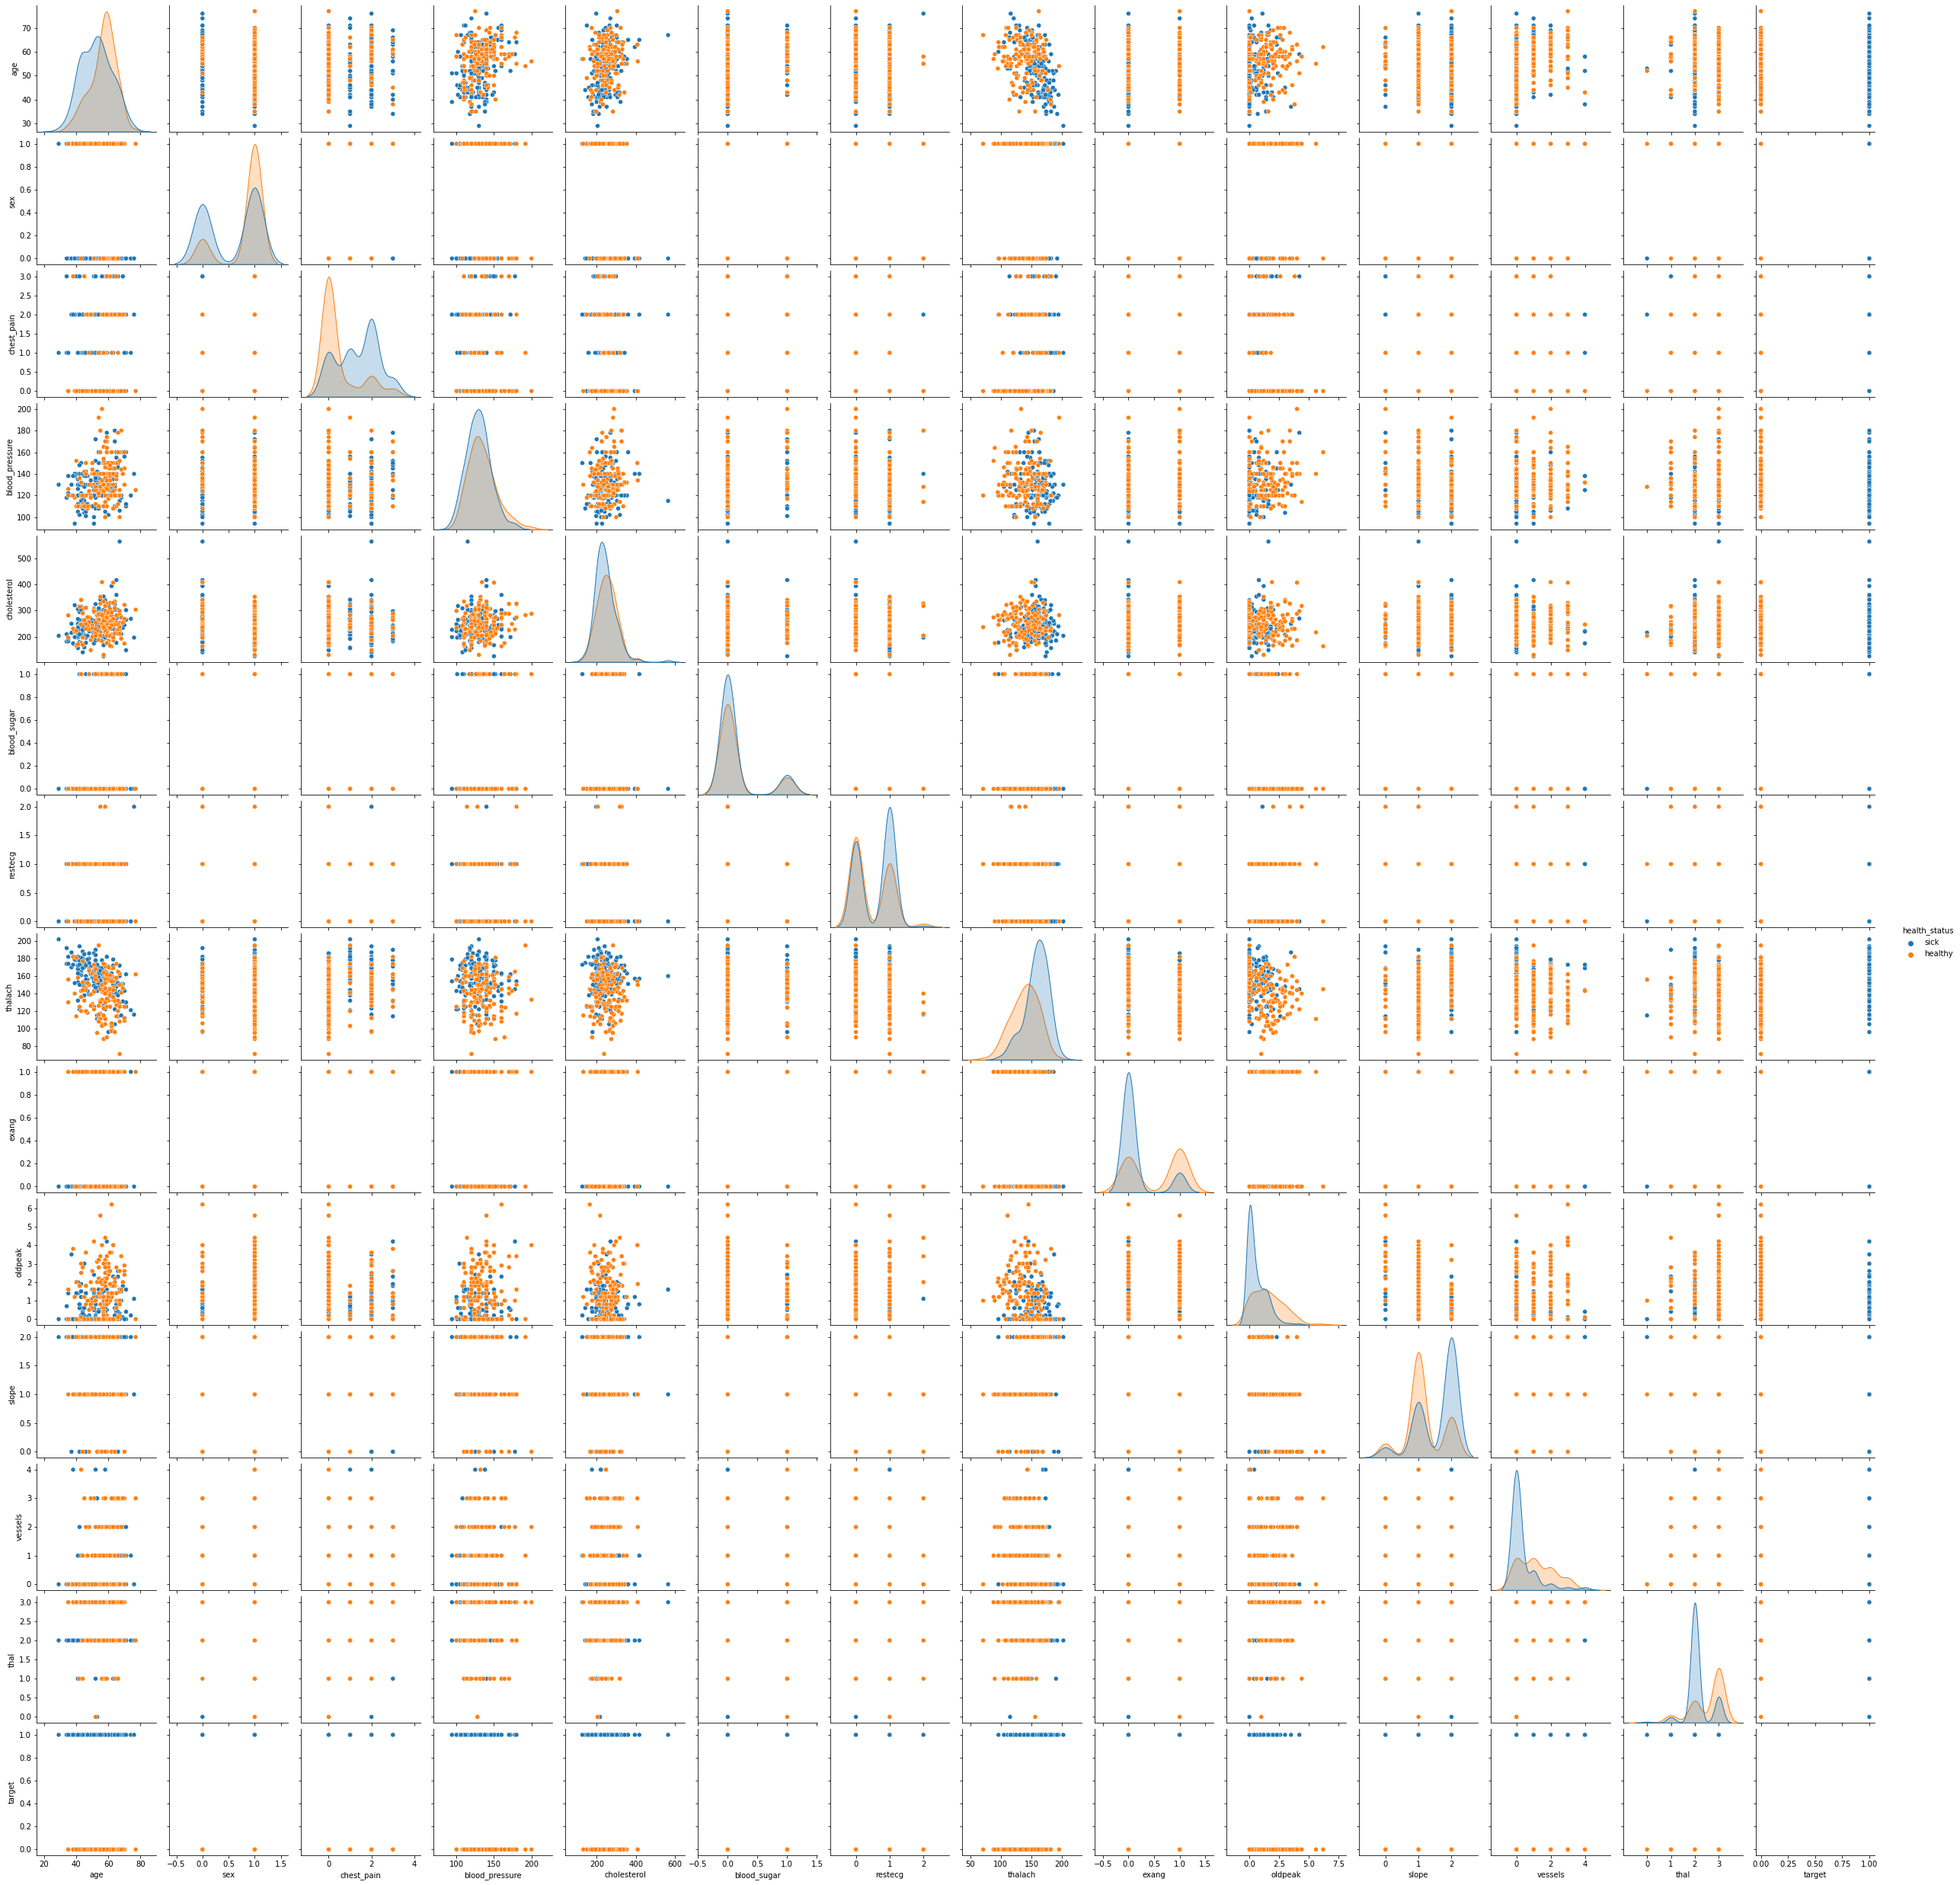

In [22]:
sns.pairplot(heart, hue='health_status')

## Create a correlation heatmap 

In [23]:
heart.corr()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
blood_pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

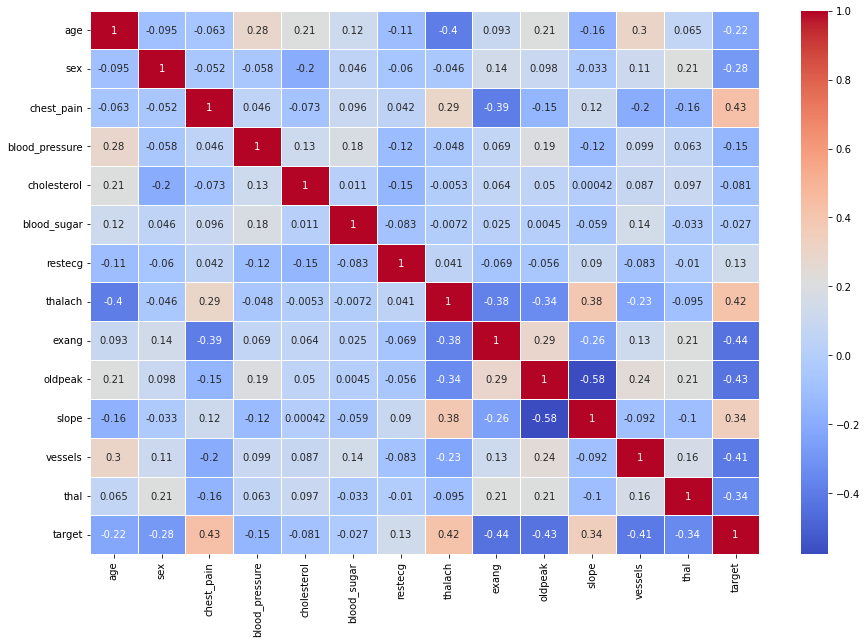

In [24]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heart.corr(),annot=True,cmap='coolwarm',linewidths=.5)

## Zoom in on individual variables and correlations with target

**There are twice as many men in the data set**

In [25]:
heart['gender'].value_counts()

M    206
F     96
Name: gender, dtype: int64

**Distribution of heart disease between men and women**

In [26]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
F       healthy           24
        sick              72
M       healthy          114
        sick              92
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

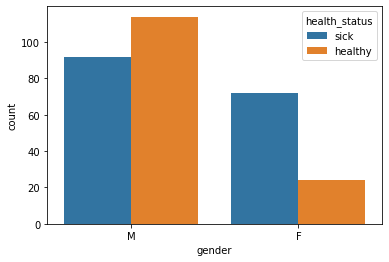

In [27]:
sns.countplot(data=heart, x='gender', hue='health_status')

In [28]:
heart['sex'].corr(heart['target'])

-0.2836093577958625

**Distribution of heart disease between categories of chest pain**

It seems like category 0 might be correlated with the absence of heart disease.

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

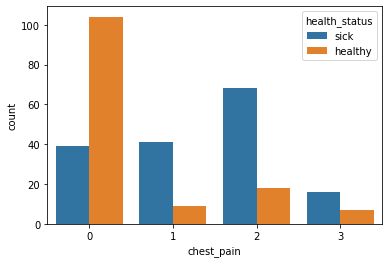

In [29]:
sns.countplot(data=heart, x='chest_pain', hue='health_status')

In [30]:
heart['chest_pain'].corr(heart['target'])

0.432079591566407

**Distribution of heart disease between categories of slope**

It seems like category 2 might be correlated with heart disease

<AxesSubplot:xlabel='slope', ylabel='count'>

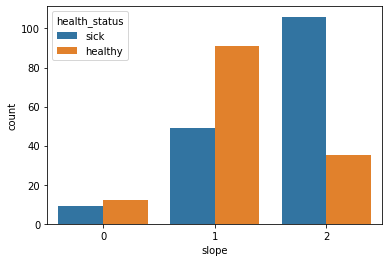

In [31]:
sns.countplot(data=heart, x='slope', hue='health_status')

In [32]:
heart['slope'].corr(heart['target'])

0.34393953248938663

**Distribution of heart disease with thalach**

<AxesSubplot:xlabel='thalach', ylabel='Density'>

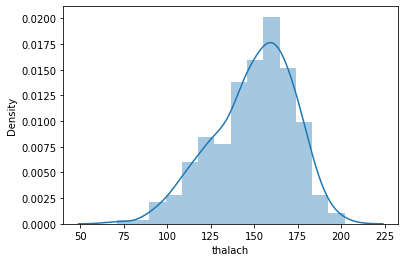

In [33]:
sns.distplot(heart['thalach'])

<AxesSubplot:xlabel='thalach', ylabel='count'>

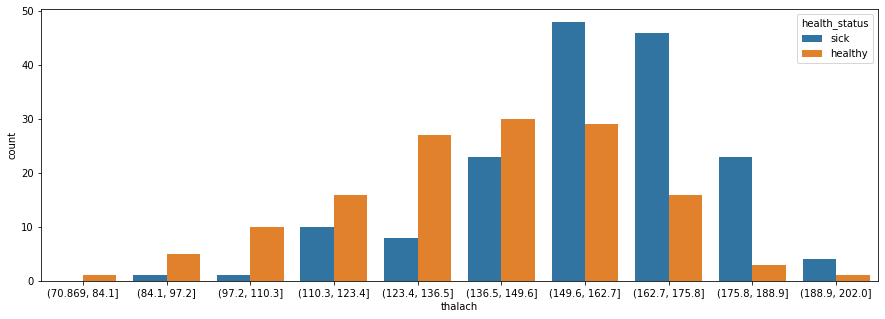

In [34]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heart, x=pd.cut(heart['thalach'], 10), hue='health_status')

In [35]:
heart['thalach'].corr(heart['target'])

0.41995504366386954

**Distribution of heart disease between categories of thal**

It seems like category 2 might be correlated with heart disease

<AxesSubplot:xlabel='thal', ylabel='count'>

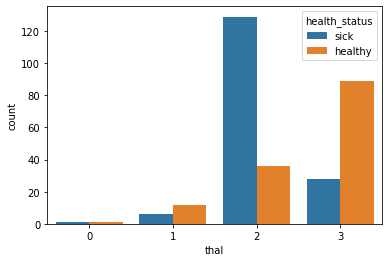

In [36]:
sns.countplot(data=heart, x='thal', hue='health_status')

In [37]:
heart['thal'].corr(heart['target'])

-0.3431007123895646

**Distribution of heart disease between number of heart vessels colored by flourosopy**

It seems like 0 vessels colored might be correlated with heart disease

<AxesSubplot:xlabel='vessels', ylabel='count'>

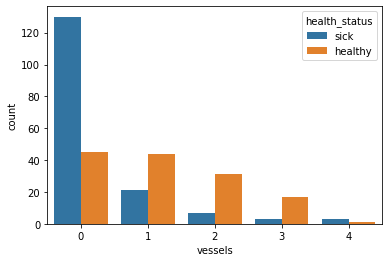

In [38]:
sns.countplot(data=heart, x='vessels', hue='health_status')

In [39]:
heart['vessels'].corr(heart['target'])

-0.4089919797569272

**Distribution of heart disease with oldpeak levels (binned)**

It seems like 0-1 range might be correlated with heart disease
Very similar distribution to vessels above

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

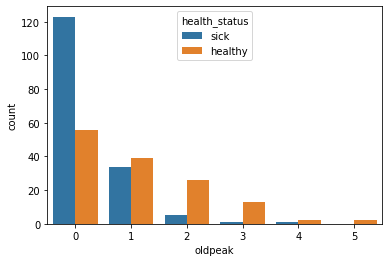

In [40]:
#bin oldpeak with pd.cut

sns.countplot(data=heart, x=pd.cut(heart['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='health_status')

In [41]:
heart['oldpeak'].corr(heart['target'])

-0.42914583288673774

In [42]:
heart['oldpeak'].corr(heart['vessels'])

0.23656044177478672

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

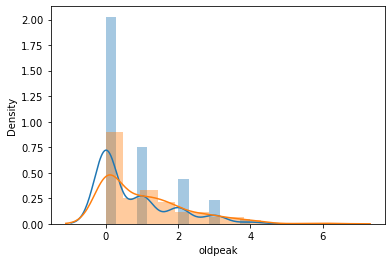

In [43]:
sns.distplot(heart['vessels'])
sns.distplot(heart['oldpeak'])

**Distribution of age**

In [44]:
heart['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [45]:
heart['age'].mean()

54.420529801324506

<AxesSubplot:xlabel='age', ylabel='Density'>

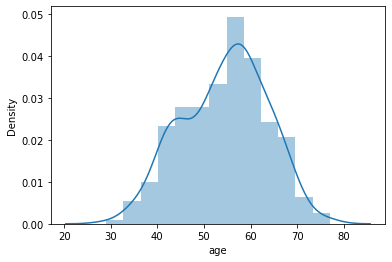

In [46]:
sns.distplot(heart['age'])

<AxesSubplot:xlabel='blood_pressure', ylabel='Density'>

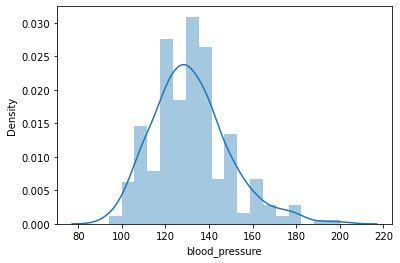

In [47]:
sns.distplot(heart['blood_pressure'])

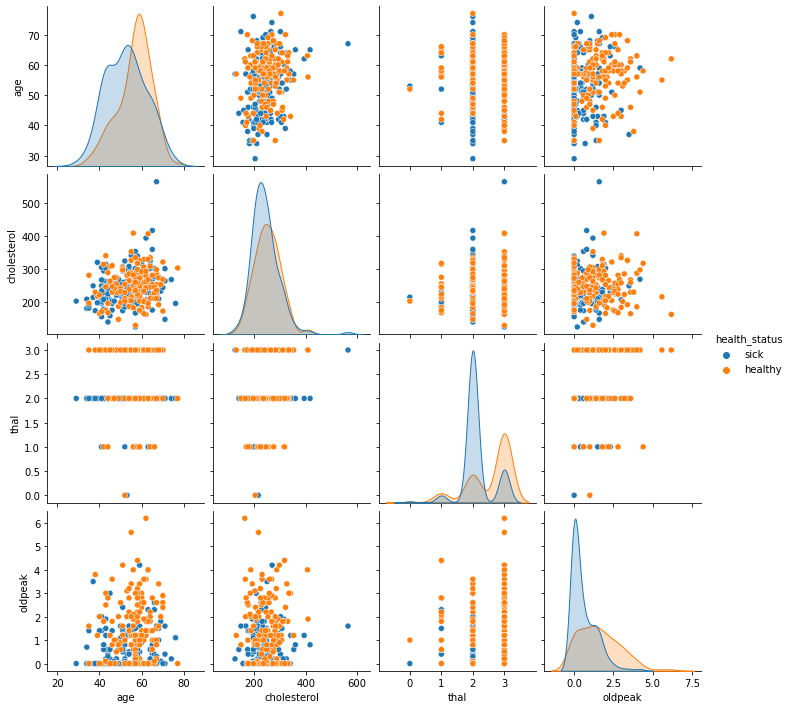

In [48]:
sns.pairplot(heart , vars = ['age', 'cholesterol', 'thal', 'oldpeak'], hue='health_status')